# Profit Prediction

In that project I will try to predict the profits. I will try with Tensorflow Keras and Scikit-Learn. Deep Learning isn't good in dataset,that has under 1000 rows. Nevertheless I will try.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('https://raw.githubusercontent.com/amankharwal/Website-data/master/Startups.csv')

In [3]:
df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [4]:
df.shape

(50, 5)

In [5]:
df.isnull().sum()

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [7]:
df.describe()

,R&D Spend,Administration,Marketing Spend,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


<Axes: >

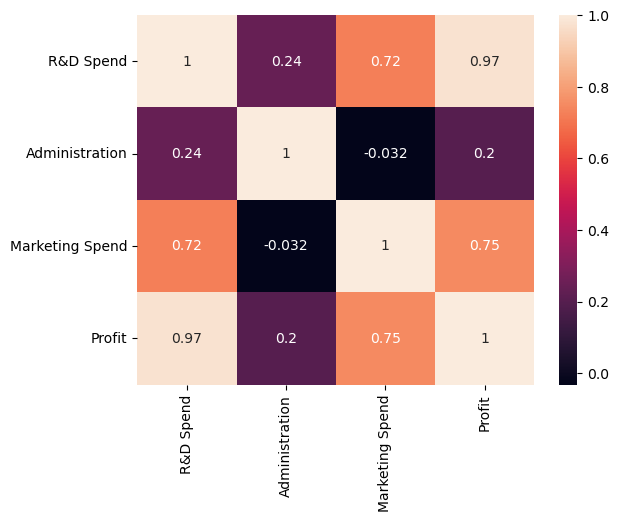

In [8]:
sns.heatmap(df.corr(numeric_only=True),annot=True)

In [9]:
#I can take all numerical columns. Also from this we can understand that R&D Spend is highly correlated with Profit.
abs(df.corr(numeric_only=True)['Profit']).sort_values(ascending=False)

Profit             1.000000
R&D Spend          0.972900
Marketing Spend    0.747766
Administration     0.200717
Name: Profit, dtype: float64

In [10]:
x=df[['R&D Spend','Administration','Marketing Spend']]
y=df['Profit']

In [11]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

## Classical Machine Learning Algorithms

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
pd.set_option("display.max_columns",100)

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge,Lasso
from sklearn.linear_model import ElasticNet
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.tree import ExtraTreeRegressor
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error


def algo_test(x,y):
        L=LinearRegression()
        R=Ridge()
        Lass=Lasso()
        E=ElasticNet()
        ETR=ExtraTreeRegressor()
        GBR=GradientBoostingRegressor()
        kn=KNeighborsRegressor()
        dt=DecisionTreeRegressor()
        xgb=XGBRegressor()
       
        
        algos=[L,R,Lass,E,ETR,GBR,kn,dt,xgb]
        algo_names=['Linear','Ridge','Lasso','ElasticNet','Extra Tree','Gradient Boosting','KNeighborsRegressor','Decision Tree','XGBRegressor']
        
        x_train, x_test, y_train, y_test=train_test_split(x,y,test_size=.2,random_state=42)
        
        r_squared= []
        rmse= []
        mae= []
        
        
        result=pd.DataFrame(columns=['R_Squared','RMSE','MAE'],index=algo_names)
        
        
        for algo in algos:
            p=algo.fit(x_train,y_train).predict(x_test)
            r_squared.append(r2_score(y_test,p))
            rmse.append(mean_squared_error(y_test,p)**.5)
            mae.append(mean_absolute_error(y_test,p))
        
            

        
        result.R_Squared=r_squared
        result.RMSE=rmse
        result.MAE=mae
        
       
        rtable=result.sort_values('R_Squared',ascending=False)
        return rtable

In [13]:
algo_test(x,y)

,R_Squared,RMSE,MAE
Gradient Boosting,0.901639,8924.781636,8275.691663
Lasso,0.900065,8995.905778,6979.152235
ElasticNet,0.900065,8995.905792,6979.152246
Linear,0.900065,8995.905803,6979.152252
Ridge,0.900065,8995.905803,6979.152252
XGBRegressor,0.873017,10140.508715,7757.660484
Decision Tree,0.849069,11055.421463,7899.428000
Extra Tree,0.794316,12905.863207,10953.108000
KNeighborsRegressor,0.294901,23895.260822,14869.748600


## Deep Learning

In [14]:
from keras.models import Sequential
from keras.layers import Dense

In [15]:
model = Sequential()
model.add(Dense(16, activation="relu"))
model.add(Dense(4, activation="relu"))
model.add(Dense(1))
model.compile(loss="mse", optimizer="adam")

In [16]:
history = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=100)

Epoch 1/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 82ms/step - loss: 12530905088.0000 - val_loss: 6842340864.0000
Epoch 2/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 11604441088.0000 - val_loss: 6348120576.0000
Epoch 3/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 11079066624.0000 - val_loss: 5871143424.0000
Epoch 4/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 11250809856.0000 - val_loss: 5422348800.0000
Epoch 5/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 9516751872.0000 - val_loss: 5007247360.0000
Epoch 6/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 8736182272.0000 - val_loss: 4615692288.0000
Epoch 7/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 8373478400.0000 - val_loss: 4244365824.0000
Epoch 8/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 7431006720.0000 - val_loss: 3903940096.0000
Epoch 9/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 7100915200.0000 - val_loss: 3587366912.0000
Epoch 10/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 6415601152.0000 - v

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 388627296.0000 - val_loss: 91294584.0000
Epoch 62/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 374626944.0000 - val_loss: 93724376.0000
Epoch 63/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 404494848.0000 - val_loss: 96497472.0000
Epoch 64/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 390972704.0000 - val_loss: 99157688.0000
Epoch 65/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 370785504.0000 - val_loss: 102236712.0000
Epoch 66/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 425422112.0000 - val_loss: 106688848.0000
Epoch 67/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 388808608.0000 - val_loss: 112126400.0000
Epoch 68/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 344637088.0000 - val_loss: 117801104.0000
Epoch 69/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 401526560.0000 - val_loss: 123709648.0000
Epoch 70/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 354828832.0000 - val_loss: 128931280.0000
Epoch 7

In [17]:
predictions = model.predict(x_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


In [18]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

In [19]:
print("Mean Absolute Error: ", mean_absolute_error(y_test, predictions))
print("Mean Squared Error: ", mean_squared_error(y_test, predictions)**.5)
print("R2 Score: ", r2_score(y_test, predictions))

Mean Absolute Error:  13741.506609375001
Mean Squared Error:  16415.909370762885
R2 Score:  0.6672206493218101


## The Best Model

In [20]:
from sklearn.linear_model import Lasso
lm=Lasso()
lm_model=lm.fit(x_train,y_train)

In [21]:
import pickle
with open('model.pkl', 'wb') as file:
    pickle.dump(lm_model, file)

In [22]:
with open('model.pkl', 'rb') as file:
    loaded_model = pickle.load(file)
print(loaded_model)

Lasso()
